# Training an Artificial Neural Network

In [2]:
# uv init
# uv add tensorflow
!uv add matplotlib  # executes shell command

Resolved 135 packages in 434ms
Installed 6 packages in 528ms
 + contourpy==1.3.3
 + cycler==0.12.1
 + fonttools==4.60.1
 + kiwisolver==1.4.9
 + matplotlib==3.10.7
 + pyparsing==3.2.5


In [3]:
from matplotlib import pyplot as plt

In [69]:
import tensorflow as tf
from tensorflow import keras as k
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPool2D, AvgPool2D, BatchNormalization, Activation
# TODO: check if there is adaptive AveragePooling in TF

## Goal
Recognize the type of clothing from a 28 by 28 pixel image

In [ ]:
LABELS = "t-shirt,trouser,pullover,dress,coat,sandal,shirt,sneaker,bag,boot".split()

## Get Data

In [5]:
# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data
(Xtrain, ytrain), (Xtest, ytest) = load_data()

In [6]:
Xtrain.shape, ytrain.shape

((60000, 28, 28), (60000,))

([], [])

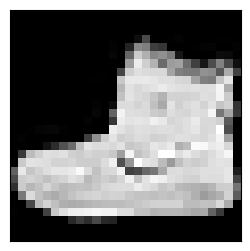

In [7]:
plt.figure(figsize=(3, 3))
plt.imshow(Xtrain[0], cmap="gray")
plt.xticks([])
plt.yticks([])

### Preprocessing

In [75]:
N = 60000  # number of data points

X8 = Xtrain.reshape(60000, 28, 28, 1)[:N]  # 4D array
y = k.utils.to_categorical(ytrain[:N])
X = X8 / 255.0  # make normalized floats

### Define a model

In [76]:
m = Sequential([
    k.Input(shape=(28, 28, 1)),  # without 1st dimension

    Conv2D(filters=10, kernel_size=(3, 3),
           #kernel_regularizer=tf.keras.regularizers.L2(1000000.0),
          ),
    MaxPool2D(pool_size=(2, 2)),
    BatchNormalization(),  # has to be right before activation
    Activation("relu"),
    
    Conv2D(filters=20, kernel_size=(3, 3),
           ),
    AvgPool2D(pool_size=(2, 2)),
    BatchNormalization(),  # has to be right before activation
    Activation("relu"),
    Dropout(0.5),  # Like a Layer
    
    Flatten(),
    #Dense(units=10, activation="relu"),
    Dense(units=10, activation="softmax"), # DO NOT EDIT THIS LINE
])
m.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [77]:
m.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 26, 26, 10)          │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 13, 13, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 13, 13, 10)          │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 13, 13, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 11, 11, 20)          │           1,820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_9                  │ (None, 5, 5, 20)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 5, 5, 20)            │              80 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 5, 5, 20)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 5, 5, 20)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,050 (27.54 KB)

 Trainable params: 6,990 (27.30 KB)

 Non-trainable params: 60 (240.00 B)

### Train

In [78]:
history = m.fit(X, y, batch_size=200, epochs=20, validation_split=0.2, verbose=True)

Epoch 1/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.6825 - loss: 0.8929 - val_accuracy: 0.5735 - val_loss: 1.3880
Epoch 2/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.8052 - loss: 0.5322 - val_accuracy: 0.8213 - val_loss: 0.4798
Epoch 3/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.8289 - loss: 0.4678 - val_accuracy: 0.8497 - val_loss: 0.4086
Epoch 4/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.8412 - loss: 0.4393 - val_accuracy: 0.8265 - val_loss: 0.4465
Epoch 5/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.8501 - loss: 0.4150 - val_accuracy: 0.8629 - val_loss: 0.3741
Epoch 6/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.8529 - loss: 0.4043 - val_accuracy: 0.8601 - val_loss: 0.3783
Epoch 7/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.8564 - loss: 0.3980 - val_accuracy: 0.8757 - val_loss: 0.3494
Epoch 8/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.8594 - loss: 0.3865 - val_acc

Text(0.5, 0, 'epochs')

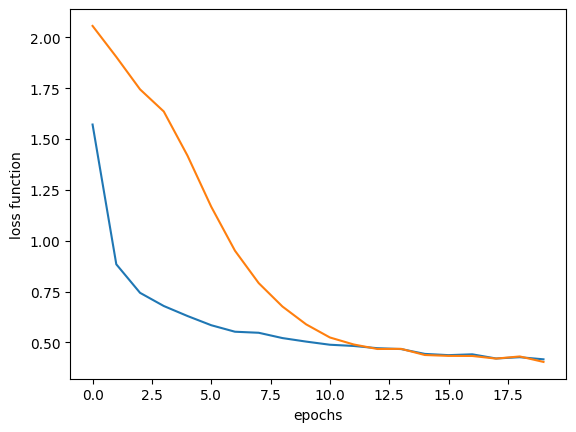

In [73]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.ylabel("loss function")
plt.xlabel("epochs")

Text(0.5, 0, 'epochs')

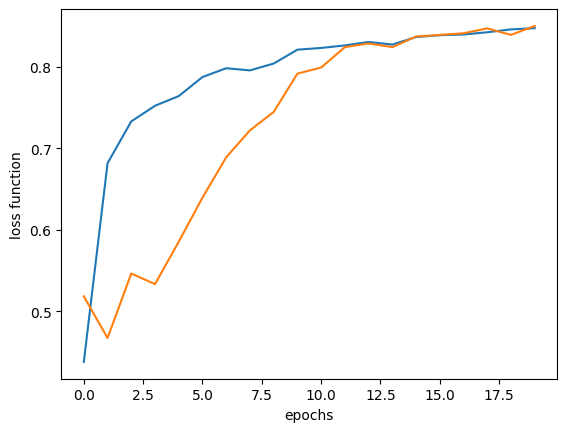

In [74]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.ylabel("loss function")
plt.xlabel("epochs")